<a href="https://colab.research.google.com/github/Diana2724/-Public-Project/blob/main/%EA%B0%9D%EC%B2%B4%EC%9D%B8%EC%8B%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 필요한 라이브러리 설치
!pip install transformers datasets torch torchvision timm

from transformers import DetrImageProcessor, DetrForObjectDetection
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.8/547.8 kB 4.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 11.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.8/40.8 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 7.6 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/4.59k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/167M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/102M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/detr-resnet-50 were not used when initializing DetrForObjectDetection: ['model.backbone.conv_encoder.model.layer1.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer2.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer3.0.downsample.1.num_batches_tracked', 'model.backbone.conv_encoder.model.layer4.0.downsample.1.num_batches_tracked']
- This IS expected if you are initializing DetrForObjectDetection from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DetrForObjectDetection from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


preprocessor_config.json:   0%|          | 0.00/290 [00:00<?, ?B/s]

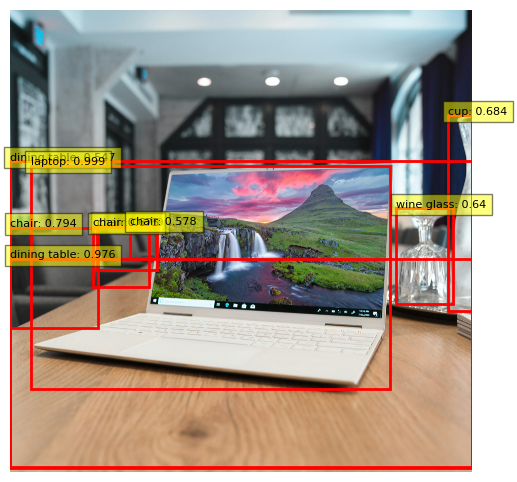

In [2]:
# 모델과 프로세서 로드
model = DetrForObjectDetection.from_pretrained('facebook/detr-resnet-50')
processor = DetrImageProcessor.from_pretrained('facebook/detr-resnet-50')

# 예제 이미지 URL (다른 이미지 URL 사용)
url = 'https://images.unsplash.com/photo-1593642532973-d31b6557fa68'
image = Image.open(requests.get(url, stream=True).raw)

# 이미지 전처리
inputs = processor(images=image, return_tensors="pt")

# 모델 추론
outputs = model(**inputs)

# 결과 추출
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

# 결과 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(image)

# 바운딩 박스 그리기
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    score = round(score.item(), 3)
    label = model.config.id2label[label.item()]
    box_w, box_h = box[2] - box[0], box[3] - box[1]

    # 바운딩 박스 그리기
    ax.add_patch(patches.Rectangle((box[0], box[1]), box_w, box_h, linewidth=2, edgecolor='r', facecolor='none'))

    # 글자 크기 조정 및 위치 조정
    text_x = box[0]
    text_y = box[1] - 10 if box[1] - 10 > 10 else box[1] + 10
    ax.text(text_x, text_y, f'{label}: {score}', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))


plt.axis('off')
plt.show()

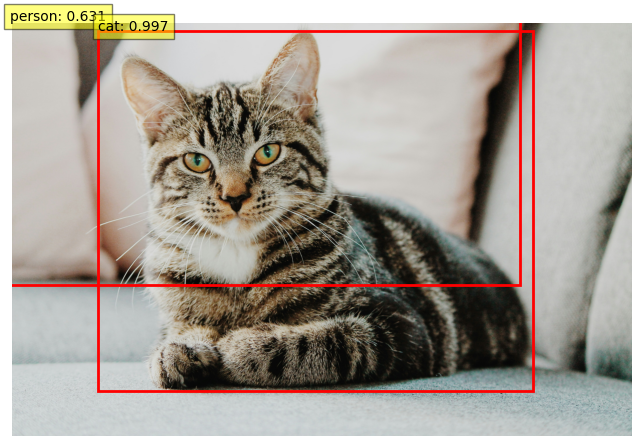

In [3]:
# 새로운 이미지 URL
url = 'https://images.unsplash.com/photo-1518791841217-8f162f1e1131'  # 고양이 이미지
image = Image.open(requests.get(url, stream=True).raw)

# 나머지 코드는 동일하게 실행
inputs = processor(images=image, return_tensors="pt")
outputs = model(**inputs)
target_sizes = torch.tensor([image.size[::-1]])
results = processor.post_process_object_detection(outputs, target_sizes=target_sizes)[0]

fig, ax = plt.subplots(1, 1, figsize=(8, 6))
ax.imshow(image)
for score, label, box in zip(results["scores"], results["labels"], results["boxes"]):
    box = [round(i, 2) for i in box.tolist()]
    score = round(score.item(), 3)
    label = model.config.id2label[label.item()]
    box_w, box_h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(patches.Rectangle((box[0], box[1]), box_w, box_h, linewidth=2, edgecolor='r', facecolor='none'))
    ax.text(box[0], box[1], f'{label}: {score}', fontsize=10, bbox=dict(facecolor='yellow', alpha=0.5))
plt.axis('off')
plt.show()


Using cache found in /root/.cache/torch/hub/ultralytics_yolov5_master
YOLOv5 🚀 2024-6-14 Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients, 16.4 GFLOPs
Adding AutoShape... 


        xmin       ymin         xmax         ymax  confidence  class name
0  534.63385  36.430199  3777.536865  2557.928711    0.699889     15  cat


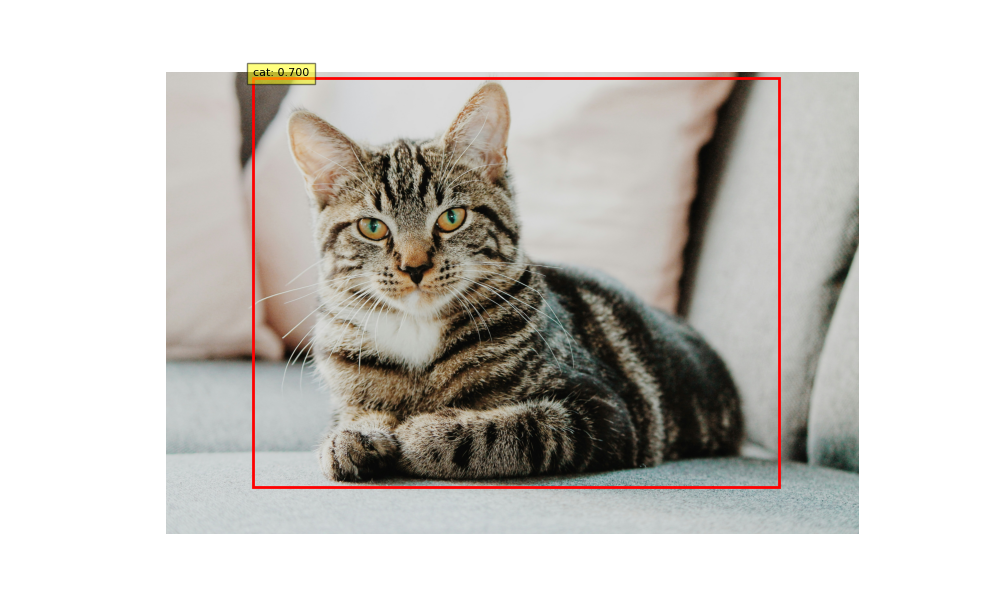

In [12]:
import torch
from PIL import Image
import requests
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from io import BytesIO

# YOLOv5 모델 로드
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', pretrained=True)

# 이미지 URL
url = 'https://images.unsplash.com/photo-1518791841217-8f162f1e1131'
response = requests.get(url)
image = Image.open(BytesIO(response.content))

# 객체 인식 수행
results = model(image)

# 결과 데이터프레임
df = results.pandas().xyxy[0]

# 결과 출력 확인
print(df)

# 결과 시각화
fig, ax = plt.subplots(1, 1, figsize=(10, 6))
ax.imshow(image)

# 바운딩 박스 그리기
for _, row in df.iterrows():
    xmin, ymin, xmax, ymax, confidence, _, name = row
    box_w, box_h = xmax - xmin, ymax - ymin

    # 바운딩 박스 그리기
    ax.add_patch(patches.Rectangle((xmin, ymin), box_w, box_h, linewidth=2, edgecolor='r', facecolor='none'))

    # 글자 크기 조정 및 위치 조정
    text_x = xmin
    text_y = ymin - 10 if ymin - 10 > 10 else ymin + 10
    ax.text(text_x, text_y, f'{name}: {confidence:.3f}', fontsize=8, bbox=dict(facecolor='yellow', alpha=0.5))

plt.axis('off')
plt.savefig('/content/result.png')  # 이미지를 파일로 저장
plt.show()

# 저장된 이미지 표시
image_result = Image.open('/content/result.png')
image_result.show()

from IPython.display import Image as IPImage
IPImage(filename='/content/result.png')
